In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Kiruthika\Desktop\ratings\Beauty.csv')

print("Shape: %s" % str(df.shape))
print("Column names: %s" % str(df.columns))

df.head()

Shape: (2023070, 4)
Column names: Index(['UserId', 'ProductId', 'Rating', 'Timestamp'], dtype='object')


,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [3]:
print("Unique UserID count: %s" % str(df.UserId.nunique()))
print("Unique ProductID count: %s" % str(df.ProductId.nunique()))

Unique UserID count: 1210271
Unique ProductID count: 249274


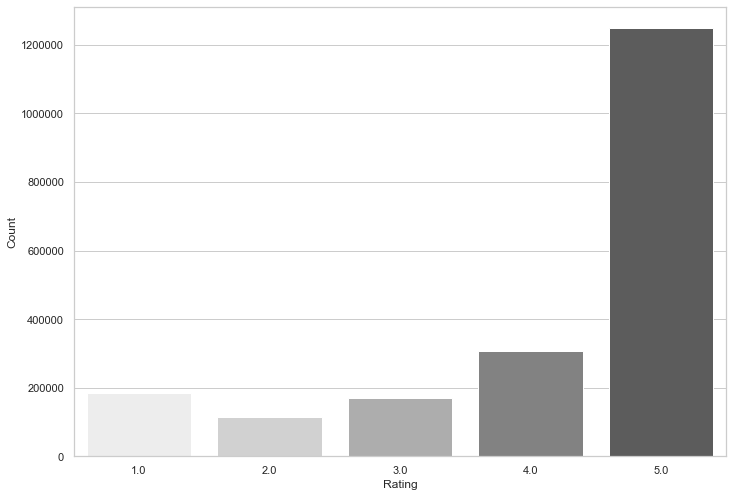

In [4]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.set_style('whitegrid')
ax = sns.countplot(x='Rating', data=df, palette=sns.color_palette('Greys'))
ax.set(xlabel='Rating', ylabel='Count')
plt.show()

In [5]:
product_rating = df.groupby('ProductId')['Rating'].mean()
product_rating.head()

ProductId
0205616461    5.0
0558925278    4.0
0733001998    4.0
0737104473    1.0
0762451459    5.0
Name: Rating, dtype: float64

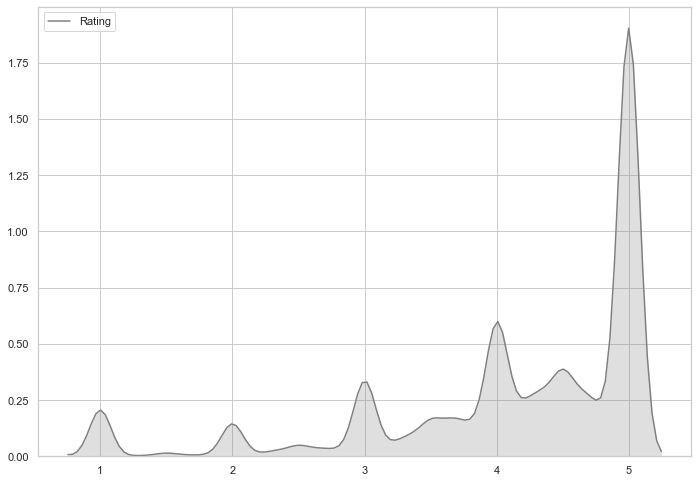

In [6]:
ax = sns.kdeplot(product_rating, shade=True, color='grey')
plt.show()

In [7]:
product_rating_count = df.groupby('ProductId')['Rating'].count()
product_rating_count.head()

ProductId
0205616461    1
0558925278    2
0733001998    1
0737104473    1
0762451459    1
Name: Rating, dtype: int64

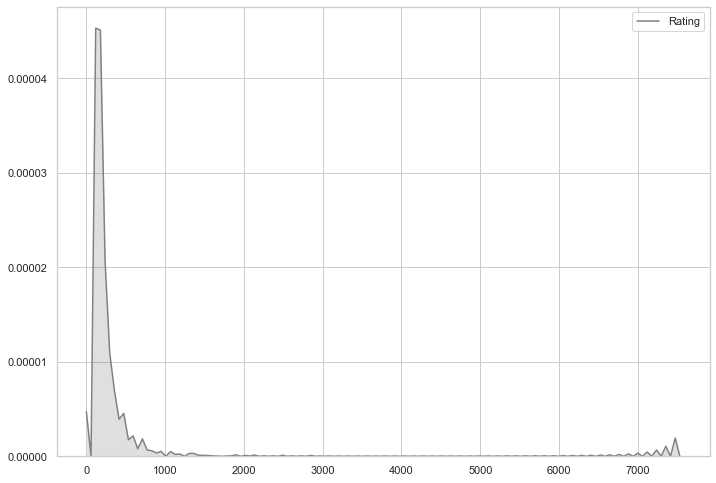

In [8]:
ax = sns.kdeplot(product_rating_count, shade=True, color='grey')
plt.show()

In [10]:
unreliability = df.groupby('ProductId')['Rating'].std(ddof = -1)
unreliability.head()

ProductId
0205616461    0.000000
0558925278    0.816497
0733001998    0.000000
0737104473    0.000000
0762451459    0.000000
Name: Rating, dtype: float64

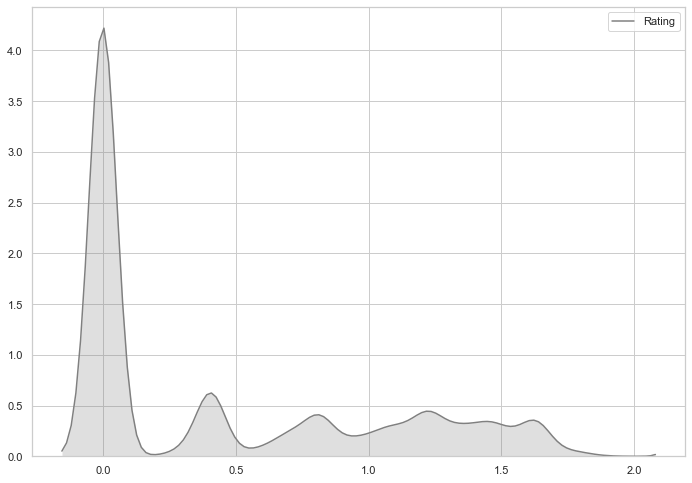

In [11]:
ax = sns.kdeplot(unreliability, shade=True, color='grey')
plt.show()

In [12]:
unique_products_list = df.ProductId.unique()
data_model = pd.DataFrame({'Rating': product_rating[unique_products_list],\
                           'Count': product_rating_count[unique_products_list], \
                          'Unreliability': unreliability[unique_products_list]})
data_model.head()

,Rating,Count,Unreliability
ProductId,,,
0205616461,5.0,1,0.000000
0558925278,4.0,2,0.816497
0733001998,4.0,1,0.000000
0737104473,1.0,1,0.000000
0762451459,5.0,1,0.000000


In [13]:
print("Data model shape (number of data points): %s" % str(data_model.shape))

Data model shape (number of data points): (249274, 3)


<Figure size 1170x827 with 0 Axes>

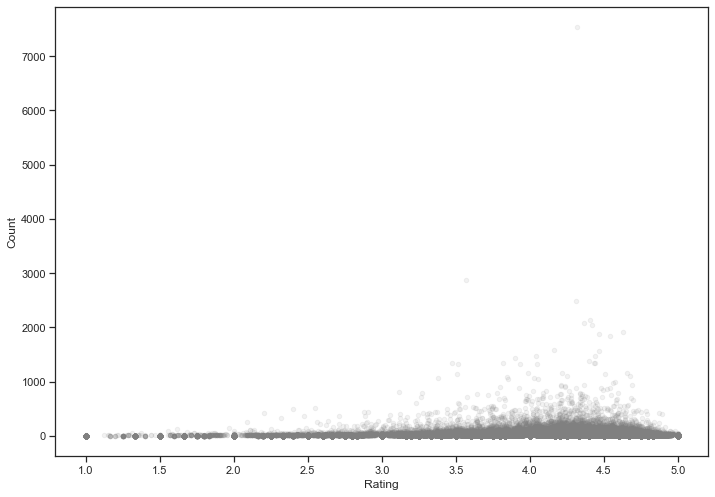

In [14]:
sns.set_style('ticks')
plt.figure(num=None, figsize=(11.7, 8.27), dpi=100, facecolor='w', edgecolor='k')

ax = data_model.plot(kind='scatter', x='Rating', y='Count', color='grey', alpha=0.1)
plt.show()

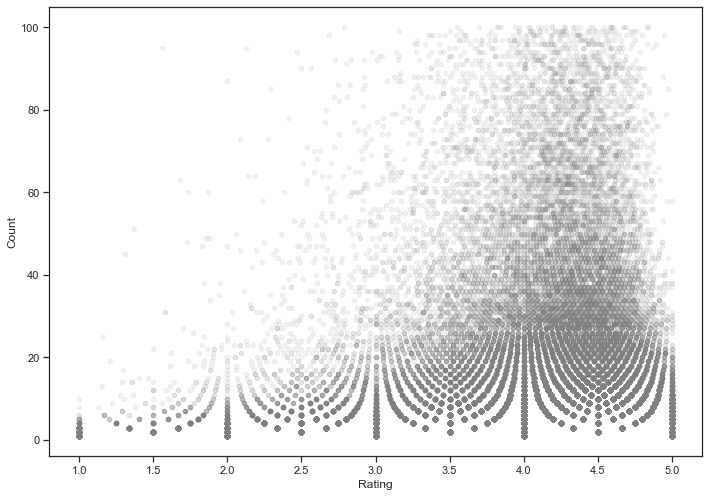

In [15]:
ax = data_model[data_model.Count < 101].plot(kind='scatter', x='Rating', y='Count', color='grey', alpha=0.1)
plt.show()

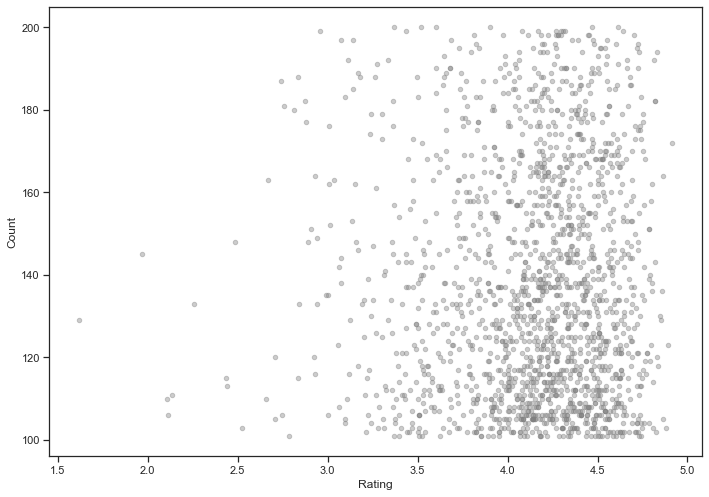

In [16]:
ax = data_model[data_model.Count > 100]\
[data_model.Count<201].plot(kind='scatter', x='Rating', y='Count', color='grey', alpha=0.4)
plt.show()

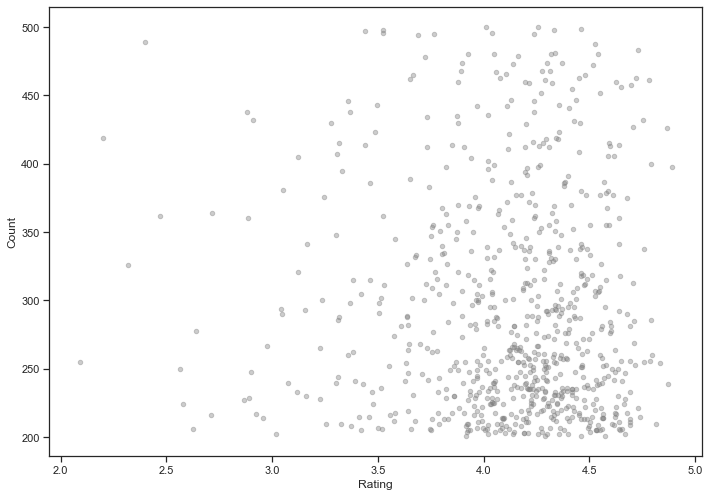

In [17]:
ax = data_model[data_model.Count > 200]\
[data_model.Count<501].plot(kind='scatter', x='Rating', y='Count', color='grey', alpha=0.4)
plt.show()

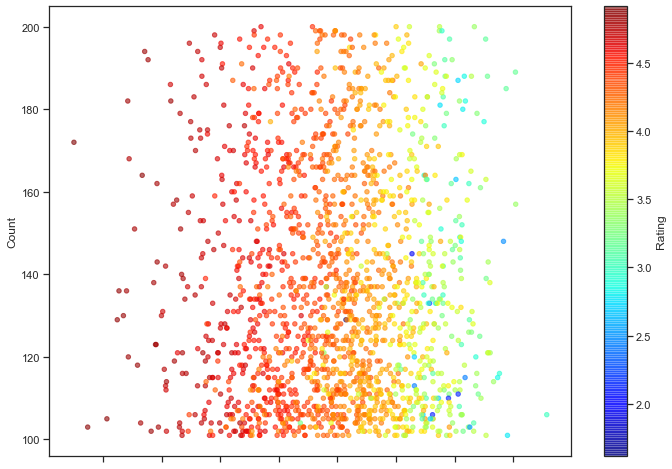

In [18]:
ax = data_model[data_model.Count > 100]\
[data_model.Count<201].plot(kind='scatter', x='Unreliability', y='Count', c='Rating', cmap='jet', alpha=0.6)
plt.show()

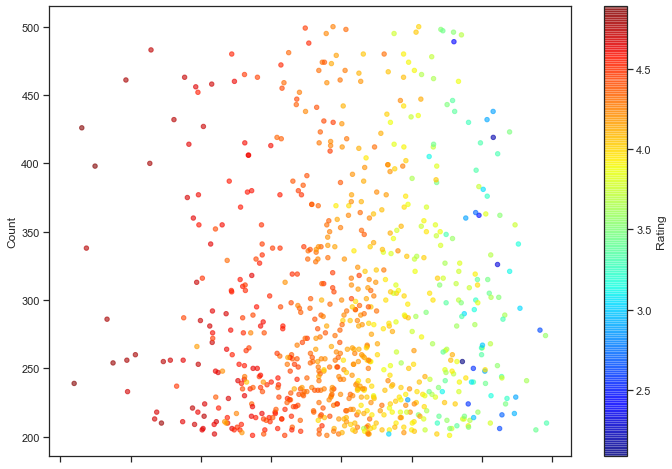

In [19]:
ax = data_model[data_model.Count > 200]\
[data_model.Count<501].plot(kind='scatter', x='Unreliability', y='Count', c='Rating', cmap='jet', alpha=0.6)
plt.show()

In [20]:
coeff_corelation = np.corrcoef(x=data_model.Unreliability, y=data_model.Rating)
print("Coefficient of corelation: ")
print(coeff_corelation)

Coefficient of corelation: 
[[ 1.         -0.26862182]
 [-0.26862182  1.        ]]


In [21]:
print(data_model.Count.describe())


count    249274.000000
mean          8.115848
std          36.064113
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        7533.000000
Name: Count, dtype: float64


In [22]:
print(data_model.Rating.describe())

count    249274.000000
mean          4.149251
std           1.047265
min           1.000000
25%           3.750000
50%           4.500000
75%           5.000000
max           5.000000
Name: Rating, dtype: float64


In [23]:
print(data_model.Unreliability.describe())

count    249274.000000
mean          0.459072
std           0.582903
min           0.000000
25%           0.000000
50%           0.000000
75%           0.978337
max           1.925233
Name: Unreliability, dtype: float64


In [24]:
data_model = data_model[data_model.Count > 50][data_model.Count < 1001].copy()
print(data_model.shape)

(6763, 3)


In [25]:
def normalize(values):
    mn = values.min()
    mx = values.max()
    return(10.0/(mx - mn) * (values - mx)+10)

In [26]:
data_model_norm = normalize(data_model)
data_model_norm.head()

,Rating,Count,Unreliability
ProductId,,,
9790790961,7.991506,0.201913,6.557281
B00004TMFE,5.713948,0.913921,7.953812
B00004TUBL,8.992153,5.387885,4.449336
B00004TUBV,7.984827,1.275239,6.268773
B00004U9UY,9.244724,1.009564,4.066169


In [27]:
engine = KNeighborsClassifier(n_neighbors=20)
data_points = data_model_norm[['Count', 'Rating', 'Unreliability']].values
labels = data_model_norm.index.values
print("Data points: ")
print(data_points)
print("Labels: ")
print(labels)
engine.fit(data_points, labels)

Data points: 
[[0.20191286 7.99150579 6.55728119]
 [0.91392136 5.71394752 7.95381168]
 [5.38788523 8.99215344 4.44933587]
 ...
 [0.21253985 9.6117244  2.18485285]
 [3.04994687 9.33120102 2.47548276]
 [4.64399575 8.69505981 5.78555039]]
Labels: 
['9790790961' 'B00004TMFE' 'B00004TUBL' ... 'B00KWE08Q0' 'B00KWFDBKE'
 'B00L5JHZJO']


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

Recommended products: 
[Index(['B00L5JHZJO', 'B00021C1LI', 'B00FAEOCP0', 'B00178TVXG', 'B000ZLVUYO',
       'B008O4YM4Y', 'B000L9YYTS', 'B001MWV40U', 'B000F63TW0', 'B000OQ2DL4',
       'B001330XFA', 'B001HTYJLO', 'B000TAE0RK', 'B0023A7JF4', 'B001TJXI5U',
       'B008RVYJS8', 'B0008IV7BU', 'B001C6H6F8', 'B000G33KEO', 'B000GHWSG6'],
      dtype='object', name='ProductId')]


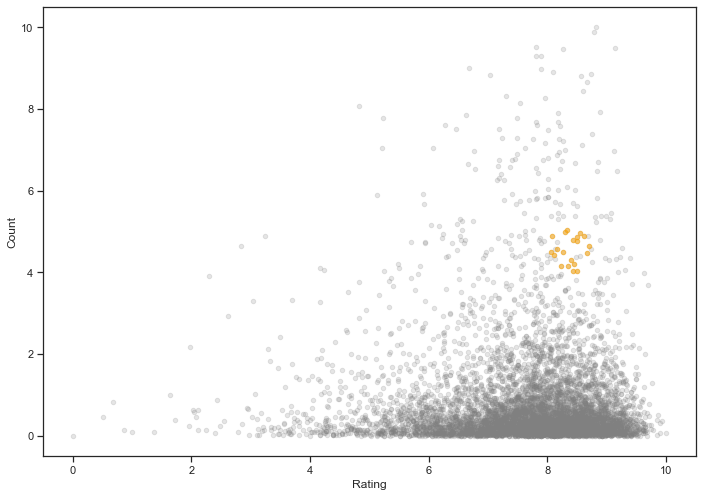

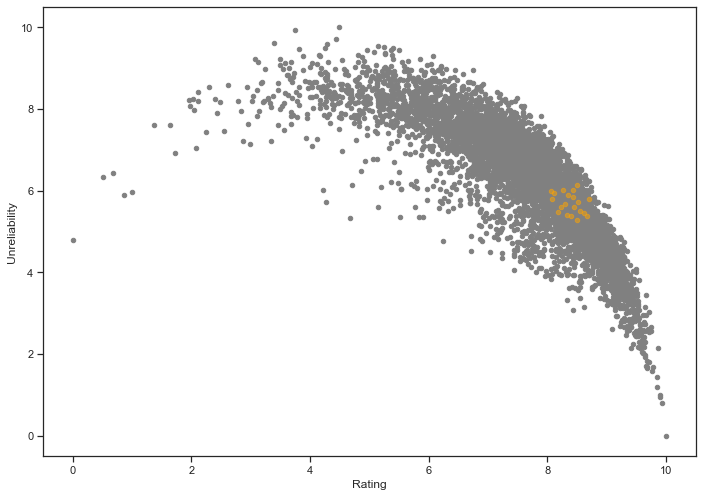

In [28]:
product_id = 'B00L5JHZJO'
product_data = [data_model_norm.loc[product_id][['Count', 'Rating', 'Unreliability']].values]

recommended_products = engine.kneighbors(X=product_data, n_neighbors=20, return_distance=False)
products_list = []

for each in recommended_products:
    products_list.append(data_model_norm.iloc[each].index)

print("Recommended products: ")
print(products_list)
ax = data_model_norm.plot(kind='scatter', x='Rating', y='Count', color='grey', alpha=0.20)
data_model_norm.iloc[recommended_products[0]].plot(kind='scatter', x='Rating', y='Count',\
                                                   color='orange', alpha=0.5, ax=ax)

ax2 = data_model_norm.plot(kind='scatter', x='Rating', y='Unreliability', color='grey')
data_model_norm.iloc[recommended_products[0]].plot(kind='scatter', x='Rating', y='Unreliability',\
                                                   color='orange', alpha=0.5, ax=ax2)
plt.show()